In [4]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
file_path = "Abhiram_paytm.xlsx"
df = pd.read_excel(file_path)

# Extract sentiment scores from the 'Score' column
sentiment_scores = df['score'].values

# Define your benchmark value
benchmark_value = 0.0 # Example benchmark, can be adjusted

# Perform the one-sample t-test
mean_score = np.mean(sentiment_scores)
std_dev = np.std(sentiment_scores, ddof=1)  # Sample standard deviation
n = len(sentiment_scores)

# Perform t-test
t_statistic, p_value = stats.ttest_1samp(sentiment_scores, benchmark_value)

# Display results
mean_score, std_dev, t_statistic, p_value


(4.092092092092092, 1.520576151065742, 85.05894040923651, 0.0)

Shapiro-Wilk Test Statistic: 0.6057, P-Value: 0.0000
Data is not normally distributed (Reject H0).


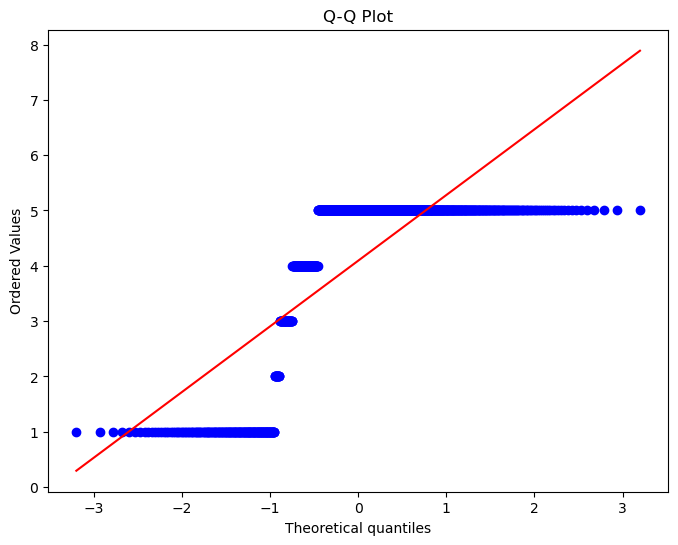

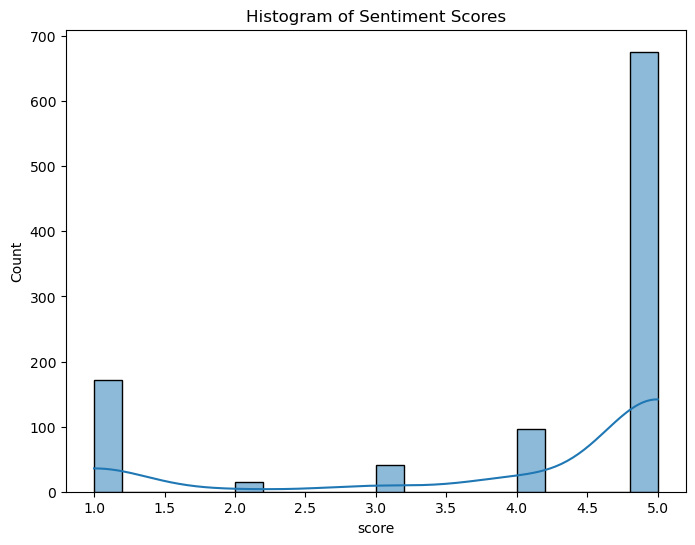

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot

# Load the dataset
file_path = "Abhiram_paytm.xlsx"
df = pd.read_excel(file_path)

# Extract sentiment scores from the 'Score' column
sentiment_scores = df['score']

# Shapiro-Wilk Test
stat, p_value = shapiro(sentiment_scores)
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")

# Interpret the p-value
if p_value > 0.05:
    print("Data is normally distributed (Fail to reject H0).")
else:
    print("Data is not normally distributed (Reject H0).")

# Q-Q Plot
plt.figure(figsize=(8, 6))
probplot(sentiment_scores, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(sentiment_scores, kde=True)
plt.title('Histogram of Sentiment Scores')
plt.xlabel('score')
plt.show()

In [8]:
import pandas as pd
from scipy.stats import levene

# Load the dataset
file_path = "Abhiram_paytm.xlsx"
df = pd.read_excel(file_path)

# Group sentiment scores by the 'Label' column
grouped_sentiments = [group['score'] for name, group in df.groupby('Label')]

# Levene's Test for equal variances
stat, p_value = levene(*grouped_sentiments)
print(f"Levene's Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")

# Interpret the p-value
if p_value > 0.05:
    print("Variances are equal (Fail to reject H0).")
else:
    print("Variances are not equal (Reject H0).")


Levene's Test Statistic: 4.1435, P-Value: 0.0161
Variances are not equal (Reject H0).


In [12]:
import pandas as pd
from scipy.stats import levene, kruskal

# Load the dataset
file_path = "Abhiram_paytm.xlsx"
df = pd.read_excel(file_path)

# Group sentiment scores by the 'Label' column
grouped_sentiments = [group['score'] for name, group in df.groupby('Label')]

# Kruskal-Wallis Test for differences between groups
h_statistic, kruskal_p_value = kruskal(*grouped_sentiments)
print(f"Kruskal-Wallis H Statistic: {h_statistic:.4f}, P-Value: {kruskal_p_value:.4f}")

# Interpret the p-value
if kruskal_p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")


Kruskal-Wallis H Statistic: 776.0087, P-Value: 0.0000
Reject the null hypothesis: There is a significant difference between the groups.


Pearson Correlation between Sentiment Score and Comment Length: -0.4702, P-Value: 0.0000
Spearman Correlation between Sentiment Score and Comment Length: -0.3234, P-Value: 0.0000


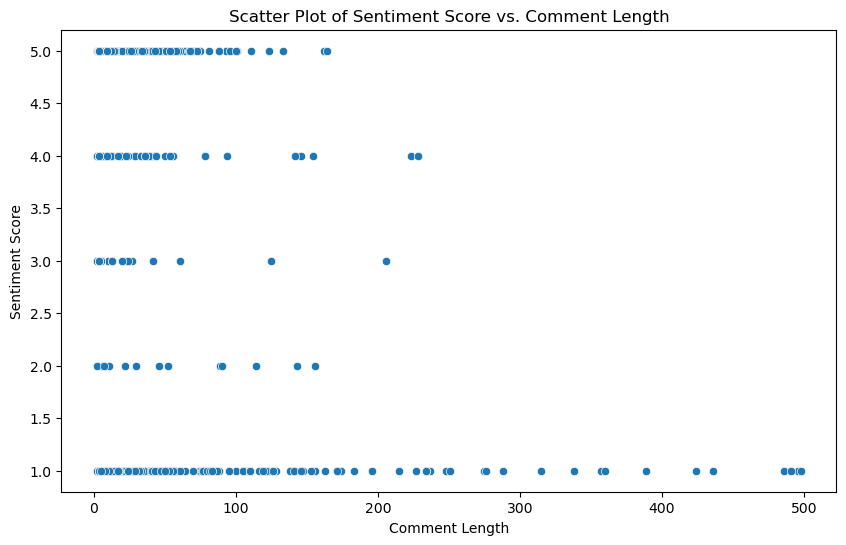

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Load your data
file_path = "Abhiram_paytm.xlsx"
df = pd.read_excel(file_path)

# Convert 'Comment' column to string type, if not already
df['review'] = df['review'].astype(str)

# Calculate the comment length
df['comment_length'] = df['review'].apply(len)

# Checking correlations between sentiment score ('Score') and comment length
pearson_corr, pearson_p_value = pearsonr(df['score'], df['comment_length'])
spearman_corr, spearman_p_value = spearmanr(df['score'], df['comment_length'])

# Print the correlation results
print(f"Pearson Correlation between Sentiment Score and Comment Length: {pearson_corr:.4f}, P-Value: {pearson_p_value:.4f}")
print(f"Spearman Correlation between Sentiment Score and Comment Length: {spearman_corr:.4f}, P-Value: {spearman_p_value:.4f}")

# Visualizing the correlation with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comment_length', y='score', data=df)
plt.title('Scatter Plot of Sentiment Score vs. Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment Score')
plt.show()


In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Load the dataset
file_path = "Abhiram_paytm.xlsx"
df = pd.read_excel(file_path)

# Convert 'Comment' column to string type, if not already
df['review'] = df['review'].astype(str)

# Create additional feature: comment length
df['comment_length'] = df['review'].apply(len)

# Calculate Pearson correlation coefficient and p-value
pearson_corr, pearson_p = stats.pearsonr(df['comment_length'], df['score'])

# Calculate Spearman's rank correlation coefficient and p-value
spearman_corr, spearman_p = stats.spearmanr(df['comment_length'], df['score'])

# Print results
print(f'Pearson Correlation Coefficient: {pearson_corr:.4f}')
print(f'Pearson p-value: {pearson_p:.4f}')
print(f'Spearman Correlation Coefficient: {spearman_corr:.4f}')
print(f'Spearman p-value: {spearman_p:.4f}')


Pearson Correlation Coefficient: -0.4702
Pearson p-value: 0.0000
Spearman Correlation Coefficient: -0.3234
Spearman p-value: 0.0000


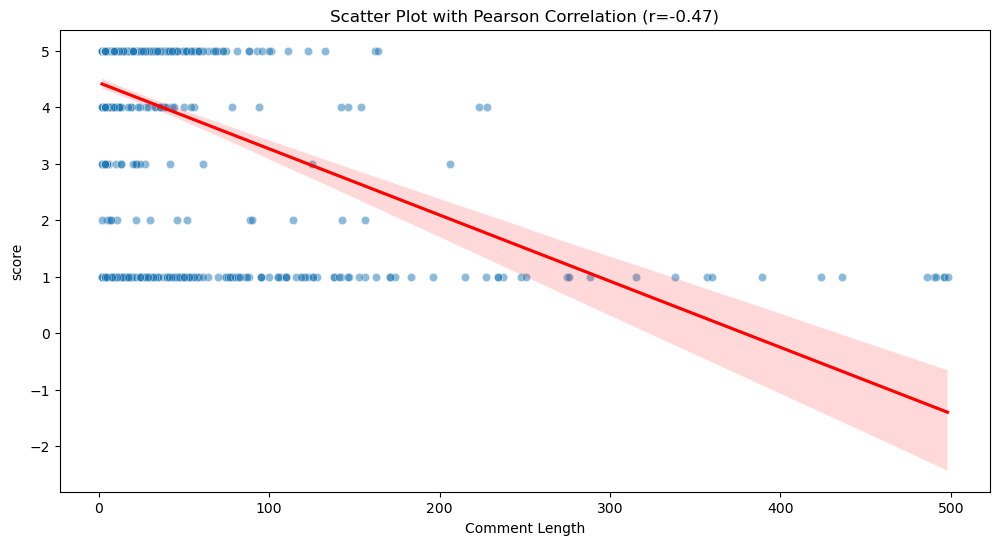

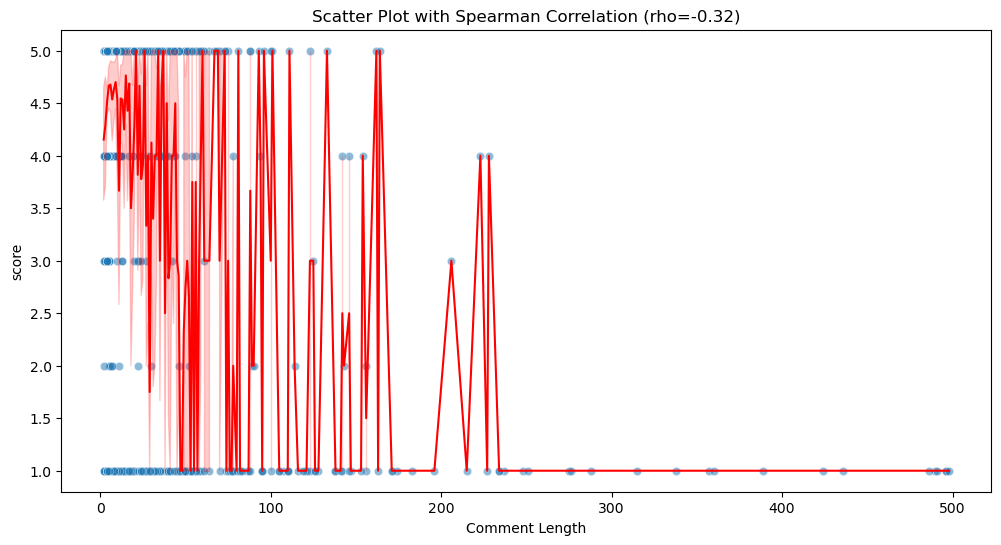

In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Abhiram_paytm.xlsx"
df = pd.read_excel(file_path)

# Convert 'Comment' column to string type, if not already
df['review'] = df['review'].astype(str)

# Create additional feature: comment length
df['comment_length'] = df['review'].apply(len)

# Calculate Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(df['comment_length'], df['score'])
# Calculate Spearman's rank correlation coefficient
spearman_corr, _ = stats.spearmanr(df['comment_length'], df['score'])

# Scatter plot with Pearson correlation line
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='score', data=df, alpha=0.5)
sns.regplot(x='comment_length', y='score', data=df, scatter=False, color='r')
plt.title(f'Scatter Plot with Pearson Correlation (r={pearson_corr:.2f})')
plt.xlabel('Comment Length')
plt.ylabel('score')
plt.show()

# Scatter plot with Spearman correlation line (non-parametric)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='score', data=df, alpha=0.5)
sns.lineplot(x='comment_length', y='score', data=df.sort_values(by='comment_length'), color='r')
plt.title(f'Scatter Plot with Spearman Correlation (rho={spearman_corr:.2f})')
plt.xlabel('Comment Length')
plt.ylabel('score')
plt.show()
